In [1]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
import scipy
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
y, sr = librosa.load('wav_files/10004_Reggae.wav', sr = 22050) # Use the default sampling rate of 22,050 Hz

In [4]:
Audio(y, rate = sr)

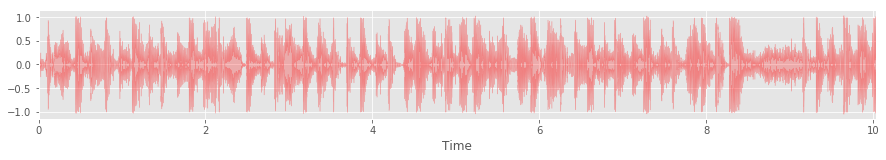

In [4]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'red')

### Part I: Time Domain Features

1) Statistical moments calculated on the raw audio

In [5]:
print('Signal mean = {:.2f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.2f}'.format(np.std(y)))
print('Signal skewness = {:.2f}'.format(scipy.stats.skew(abs(y))))
print('Signal kurtosis = {:.2f}'.format(scipy.stats.kurtosis(y)))

Signal mean = 0.17
Signal std dev = 0.24
Signal skewness = 1.92
Signal kurtosis = 2.65


2) Zero crossing rate

ZCR mean = 0.14
ZCR std dev = 0.08


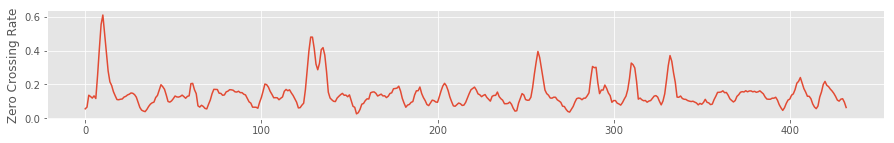

In [6]:
# Add a small constant before computing the zero crossing rate to disregard unwanted silence 'noise'
zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
plt.figure(figsize=(15,2))
plt.plot(zcr)
plt.ylabel('Zero Crossing Rate')
print('ZCR mean = {:.2f}'.format(np.mean(zcr)))
print('ZCR std dev = {:.2f}'.format(np.std(zcr)))

3) Root Mean Squared Energy

RMSE mean = 0.23
RMSE std dev = 0.08


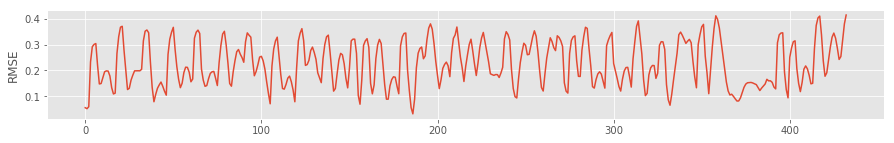

In [7]:
rmse = librosa.feature.rmse(y + 0.0001)[0]
plt.figure(figsize=(15,2))
plt.plot(rmse)
plt.ylabel('RMSE')
print('RMSE mean = {:.2f}'.format(np.mean(rmse)))
print('RMSE std dev = {:.2f}'.format(np.std(rmse)))

### Part II: Spectral Features

1) Spectral Centroid: frequency area around which most of the signal energy concentrates<br>
$f_c = \frac{\Sigma_k S(k)f(k)}{\Sigma_k S(k)}$<br>
where  S(k) is the spectral magnitude at frequency bin  k <br>
f(k) is the frequency at bin  k

Spectral Centroid mean = 2684.68
Spectral Centroid std dev = 864.75


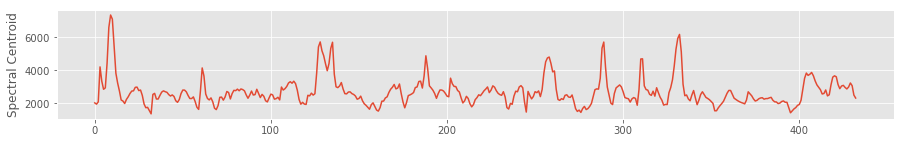

In [8]:
spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_centroids)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_centroids)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_centroids)))

2) Spectral Band-width: Other moments calculated around the spectral centroid <br>
$f_c = (\Sigma_k S(k)f(k) - f_c)^\frac{1}{p}$ <br>
When  p=2 this is like a weighted standard deviation.

Spectral Bandwidth-2 mean = 2496.07
Spectral Bandwidth-2 std dev = 446.07
Spectral Bandwidth-3 mean = 2995.85
Spectral Bandwidth-3 std dev = 403.87
Spectral Bandwidth-4 mean = 3457.40
Spectral Bandwidth-4 std dev = 358.22


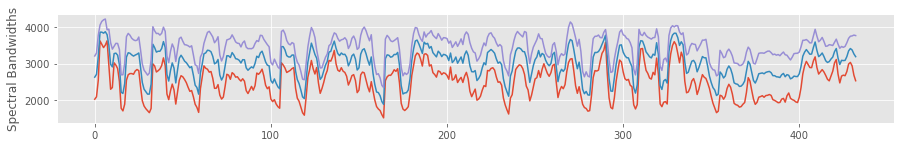

In [9]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_bandwidth_2)
plt.plot(spectral_bandwidth_3)
plt.plot(spectral_bandwidth_4)
plt.ylabel('Spectral Bandwidths')
print('Spectral Bandwidth-2 mean = {:.2f}'.format(np.mean(spectral_bandwidth_2)))
print('Spectral Bandwidth-2 std dev = {:.2f}'.format(np.std(spectral_bandwidth_2)))
print('Spectral Bandwidth-3 mean = {:.2f}'.format(np.mean(spectral_bandwidth_3)))
print('Spectral Bandwidth-3 std dev = {:.2f}'.format(np.std(spectral_bandwidth_3)))
print('Spectral Bandwidth-4 mean = {:.2f}'.format(np.mean(spectral_bandwidth_4)))
print('Spectral Bandwidth-4 std dev = {:.2f}'.format(np.std(spectral_bandwidth_4)))
# Highly Correlated features may cause issues in the model building

3) Spectral Contrast: considers the spectral peak, the spectral valley, and their difference in each frequency subband. Usually, 6 sub-bands

Means [ 18.53692603  14.12296735  17.1865416   17.09435024  17.97595421
  19.39288785  32.52840151]
Std devs [ 5.52838606  4.36644165  4.52268964  3.74321297  4.00718697  5.04404245
  2.86836045]


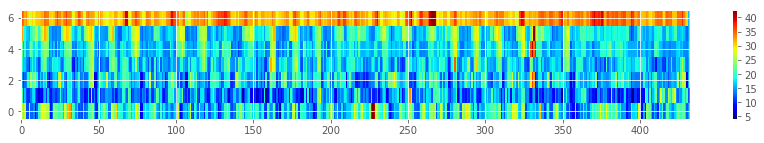

In [10]:
# Frequency cutoff for the first bin `[0, fmin]`
# Subsequent bins will cover `[fmin, 2*fmin]`, `[2*fmin, 4*fmin]
# Bins are on log scale
spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
plt.figure(figsize=(15,2))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(spectral_contrast, axis=1)) # Values are on dB scale
print('Std devs', np.std(spectral_contrast, axis=1)) 

4) Spectral Roll-off: the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

Spectral Centroid mean = 5433.18
Spectral Centroid std dev = 1565.92


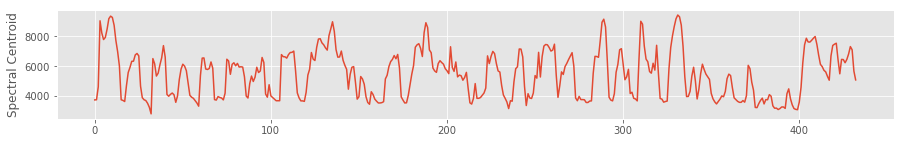

In [11]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_rolloff)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_rolloff)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_rolloff)))

# What would be a good roll_percent to use?

5) Mel-Frequency Cepstral Coefficients

Means [-37.23841146  75.94529446 -18.14988034  17.57032228   1.37181087
   1.06976115  -7.09952945  -0.79208138 -14.38936088   0.18496244
  -7.36943266   5.16491232  -1.60753404  -0.60664114  -2.82328508
   1.87539761 -13.9032362   -0.44779483  -4.39024285  -2.10727857]
Std devs [ 68.02231824  31.28377927  31.66510086  25.3430012   17.37998465
  16.87624999  17.00568586  14.70083373  13.68440635  11.47459986
  12.1049845    9.51202633  11.01140901  10.31272588   9.60601587
   8.99072119   8.11869389   7.43592498   7.1924944    7.13112262]


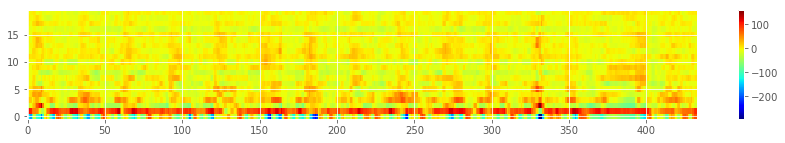

In [12]:
mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
plt.figure(figsize=(15,2))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(mfccs, axis=1)) 
print('Std devs', np.std(mfccs, axis=1)) 

6) Chroma Features (STFT)
A chroma vector (Wikipedia) is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

Means [ 0.59008948  0.5701268   0.55984985  0.39770667  0.40354997  0.3876438
  0.30378894  0.36305657  0.33760486  0.40047978  0.46314109  0.46520522]
Std devs [ 0.32046483  0.30892762  0.32522897  0.28483682  0.28278462  0.29039637
  0.23629315  0.26781864  0.2536198   0.28942646  0.29836003  0.27011112]


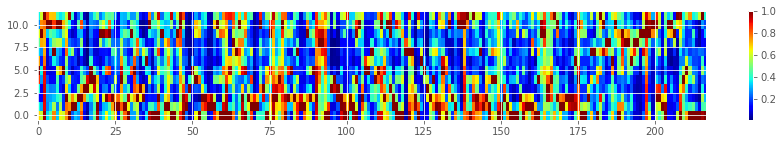

In [13]:
chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_stft, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_stft, axis=1)) 
print('Std devs', np.std(chroma_stft, axis=1)) 

7) Chroma Features (CQT)

Means [ 0.79009404  0.75839802  0.67628813  0.59520749  0.57947415  0.53817027
  0.50218286  0.52609372  0.53661424  0.55834605  0.58041989  0.62961531]
Std devs [ 0.21917203  0.22654741  0.22274471  0.22548701  0.20400771  0.21538903
  0.20382325  0.23959551  0.24238502  0.23916416  0.22553368  0.22551197]


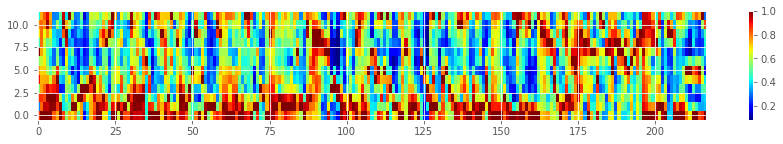

In [14]:
chroma_cqt = librosa.feature.chroma_cqt(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cqt, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cqt, axis=1)) 
print('Std devs', np.std(chroma_cqt, axis=1)) 

8) Chroma Features (CENS) - Chroma energy normalized statistics

Means [ 0.39388343  0.38194664  0.32122275  0.26778841  0.26563873  0.24106363
  0.21875876  0.22650323  0.23262528  0.24710181  0.25108297  0.28763031]
Std devs [ 0.06202911  0.05908608  0.06332909  0.0494748   0.03701892  0.04831649
  0.05488167  0.07729973  0.06351823  0.04595211  0.02674143  0.04410239]


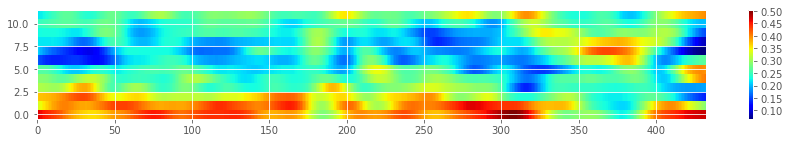

In [15]:
chroma_cens = librosa.feature.chroma_cens(y, sr=sr, hop_length=512)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cens, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cens, axis=1)) 
print('Std devs', np.std(chroma_cens, axis=1)) 

In [16]:
import os
import numpy as np
import pandas as pd
import scipy
import librosa
from tqdm import tqdm

In [17]:
WAV_DIR = 'wav_files/'
wav_files = os.listdir(WAV_DIR)[:10]

In [18]:
col_names = ['file_name', 'signal_mean', 'signal_std', 'signal_skew', 'signal_kurtosis', 
             'zcr_mean', 'zcr_std', 'rmse_mean', 'rmse_std', 'tempo',
             'spectral_centroid_mean', 'spectral_centroid_std',
             'spectral_bandwidth_2_mean', 'spectral_bandwidth_2_std',
             'spectral_bandwidth_3_mean', 'spectral_bandwidth_3_std',
             'spectral_bandwidth_4_mean', 'spectral_bandwidth_4_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(7)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(7)] + \
            ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)] + \
            ['chroma_stft_' + str(i+1) + '_mean' for i in range(12)] + \
            ['chroma_stft_' + str(i+1) + '_std' for i in range(12)] 
            
df = pd.DataFrame(columns=col_names)

In [21]:
for f in tqdm(wav_files[:10]):
    try:
        # Read wav-file
        y, sr = librosa.load(WAV_DIR+f, sr = 22050)
        
        feature_list = [f]

        feature_list.append(np.mean(abs(y)))
        feature_list.append(np.std(y))
        feature_list.append(scipy.stats.skew(abs(y)))
        feature_list.append(scipy.stats.kurtosis(y))

        zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
        feature_list.append(np.mean(zcr))
        feature_list.append(np.std(zcr))

        rmse = librosa.feature.rmse(y + 0.0001)[0]
        feature_list.append(np.mean(rmse))
        feature_list.append(np.std(rmse))
        
        tempo = librosa.beat.tempo(y, sr=sr)
        feature_list.extend(tempo)

        spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
        feature_list.append(np.mean(spectral_centroids))
        feature_list.append(np.std(spectral_centroids))

        spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
        spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
        spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
        feature_list.append(np.mean(spectral_bandwidth_2))
        feature_list.append(np.std(spectral_bandwidth_2))
        feature_list.append(np.mean(spectral_bandwidth_3))
        feature_list.append(np.std(spectral_bandwidth_3))
        feature_list.append(np.mean(spectral_bandwidth_3))
        feature_list.append(np.std(spectral_bandwidth_3))

        spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
        feature_list.extend(np.mean(spectral_contrast, axis=1))
        feature_list.extend(np.std(spectral_contrast, axis=1))

        spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
        feature_list.append(np.mean(spectral_rolloff))
        feature_list.append(np.std(spectral_rolloff))

        mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
        feature_list.extend(np.mean(mfccs, axis=1))
        feature_list.extend(np.std(mfccs, axis=1))

        chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
        feature_list.extend(np.mean(chroma_stft, axis=1))
        feature_list.extend(np.std(chroma_stft, axis=1))
        
        feature_list[1:] = np.round(feature_list[1:], decimals=3)
        
    except:
        pass
    
    df = df.append(pd.DataFrame(feature_list, index=col_names).transpose(), ignore_index=True)

# Save file
df.to_csv('df_features.csv', index=False)

100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
